<a href="https://colab.research.google.com/github/seulgi324/CATTools/blob/70X_v1/10_generative_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Housekeeping



-   Some references for today
    -   <span class="underline">[Official pytorch tutorials](https://pytorch.org/tutorials/)</span>
        -   E.g. the [DCGAN tutorial](https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html)
    -   [Deep Generative Models](https://www.deeplearningbook.org/contents/generative_models.html) from the [Deep Learning Book](https://www.deeplearningbook.org/)
    -   [GAN chapter of Dive Into Deep Learning](https://d2l.ai/chapter_generative-adversarial-networks/gan.html)
-   Today's url
    -   [https://git.io/2020deep10](https://git.io/2020deep10)
-   Email if you need help with any of this!



## Beyond Classification



-   The idea of Machine Learning and Deep Learning, in particular, is
    that the model is not just learning to classify but capturing
    essential features of the inputs: the **latent variables** of the dataset
    -   Not every pixel is created equal, in a dataset of cats, there are
        far fewer ways to draw cat images than there are possible values for the pixels
-   We can train a model to find and fit the underlying latent variables which
    captures the essential features and then can be used in ways other
    than simply classifying the input
-   For example, we could use it to do:
    -   Denoising: Given a noisy or degraded sample, recover the original
        (e.g. remove dirt or recolorize an old film image)
    -   Missing value imputation: fill in some missing data from a sample
        (e.g. given an image where a black square was put over part of the
        image, fill in what was in the square)
    -   Sampling: randomly generate a sample input drawn from the latent
        variable probability distribution (starting from some random
        noise, generate a random image that fits in the dataset)



## Sampling



-   We have a **generator**, which we think of as a black box for now
-   The generator should be fed a vector from the latent variable space
    -   We can posit that the latent variables are gaussian, so pick out a
        multi-dimensional gaussian, and give any arbitrary dimension
    -   Today, we won't give the latent variables explicit meaning, but
        for our cat e.g. it could be things like what direction the cat is
        facing, the color of the fur (along some spectrum), length of fur, shape of face, etc. etc.
-   The generator should spit out sample that is indistinguishable from
    a sample pulled from the dataset
-   Say we take MNIST, and posit a latent space of dimension 10
-   If we have an MNIST generator, we sample a gaussian 10 times, feed
    that 10D vector into the generator and it should spit out a 28x28
    image of a hand-drawn number
-   This drawing should be indistinguishable from the original MNIST set
    (given two images, one drawn from MNIST and one from the generator,
    it should be impossible to tell which is which (assuming you
    haven't just memorized the entire MNIST set))



## How to Build a Generator?



-   There are several ways we can take our basic CNN DL setup and use it
    to build a generator G
-   Thinking about the last point of the previous page: what if we had a
    network that tries to distinguish real MNIST images from images from
    the generator?
    -   A *discriminator* network D, outputs 0 for generated images, 1 for
        real images
-   We could use the discriminator output like a loss function:
    -   Use G to generate an image from a random latent vector and pass
        through D
    -   Make small changes to the parameters of G and see how D changes
    -   Update the parameters of G so that the D output **increases**
    -   I.e. we try to change G so that D gives values closer to 1 (the
        output for a real MNIST image)
    -   Eventually, G should only output images that give D output 1



## Adversaries



-   But now D is useless: it can't tell real from fake images
-   But what if we now train D? I.e. pass real images and update D so it
    gives outputs closer to 1, pass fake images and update D so it gives
    outputs closer to 0
    -   Whatever criteria D used before to tell real from fake images no
        longer works, so we retrain D to find new criteria
-   For a fixed network G, if we update D enough, images from G will be
    given output 0 and images from MNIST will have output 1
-   With the updated D, we can start training G again to fool the new D
-   We can keep playing this game as long as we like
    -   Train G to fool D
    -   Train D to figure out which images are from G
    -   Ad infinitum



## GAN



-   GAN: Generative Adversarial Network
-   This is the name for the setup we just described:
    -   Two networks are randomly initialized
        -   D takes in an image and outputs a number from 0 to 1
        -   G takes in a vector and outputs an image (so its output can be fed into D)
        -   The internal structure of the networks can be anything: D could
            be a feed-forward neural network, or a CNN, or anything else
        -   We'll go through how to structure G, but a simple feed forward
            network can also be used
    -   The networks are trained successively so the D distinguishes real
        from G images, then G is trained to fool the current D into
        believing its images are real
    -   And so on and on

Original GAN paper:
[https://arxiv.org/abs/1406.2661](https://arxiv.org/abs/1406.2661)



## GAN



![img](https://github.com/uos-computing-for-particle-physics/10-gan-seulgi324/blob/master/Gan.png?raw=1)

-   Feed noise (random point in latent space) into G
-   Train G to fool D, train D to catch out G,   
    its a competition between the two networks
-   Alternate gradient descent on batches between G and D



## This Person Does Not Exist



### :BMCOL:



![img](https://github.com/uos-computing-for-particle-physics/10-gan-seulgi324/blob/master/tpdne.jpg?raw=1)



### :BMCOL:



-   This is the first image I got when I visited [<span class="underline">this person does not exist</span>](https://www.thispersondoesnotexist.com/)
-   They've trained a GAN (technically, StyleGAN, an extension of the
    GAN idea) on human portrait photos
    -   StyleGAN also allows them to control specific aspects of the
        latent space (hair color, skin color, gender, etc.)
    -   Can see how powerful the results can be
-   Highly recommend watching the videos from nVidia on this (accessible through the link)



## CaloGAN



![img](https://github.com/uos-computing-for-particle-physics/10-gan-seulgi324/blob/master/calogan.jpg?raw=1)

![img](https://github.com/uos-computing-for-particle-physics/10-gan-seulgi324/blob/master/lar.png?raw=1)

-   In Particle Physics, applications to simulation
-   CaloGAN is training a GAN to simulate the calorimeter response to
    particles
    -   This is an extremely time consuming step in simulation and
        important for HL-LHC which will have huge pile-up
-   See also: JongSuk's project ;)

[https://github.com/hep-lbdl/CaloGAN](https://github.com/hep-lbdl/CaloGAN)
[https://indico.cern.ch/event/567550/contributions/2629438/attachments/1510662/2355700/ACAT_GAN.pdf](https://indico.cern.ch/event/567550/contributions/2629438/attachments/1510662/2355700/ACAT_GAN.pdf)



## How it looks in PyTorch



-   Let's make a really simple GAN for MNIST
    -   Simple means basic feedforward neural nets for D and G
-   Starting with the discriminator, it takes an image, treats it as a
    vector, outputs a sigmoid which should be 0 for fake, 1 for real images
-   Dropout to discourage it from memorizing inputs (also D
    usually works too well, if its too good, G will never be
    able to learn)



In [0]:
import torch

class Discriminator(torch.nn.Module):
  def __init__(self):
    super(Disc, self).__init__()
    self.fc1 = torch.nn.Linear(784,256)
    self.fc2 = torch.nn.Linear(256,128)
    self.fc3 = torch.nn.Linear(128,1)
    self.drop = torch.nn.Dropout(.5)
  def forward(self, x):
    x = x.view(-1,28*28)
    x = self.drop(torch.relu(self.fc1(x)))
    x = self.drop(torch.relu(self.fc2(x)))
    x = torch.sigmoid(self.fc3(x)).view(-1, 1)
    return x

## Generator



-   The generator is likewise fairly simple, 100 input nodes, which pass
    through some layers, up to 784 outputs = a 28x28 image
    -   The inputs can be generated from anything, they represent the
        latent space of MNIST images, we'll draw them from a normal distribution
-   BatchNorm to encourage it to speed up training



In [0]:
class Generator(torch.nn.Module):
  def __init__(self, input_size=100):
    super(Gen, self).__init__()
    self.input_size = input_size
    self.fc1 = torch.nn.Linear(self.input_size,256)
    self.fc2 = torch.nn.Linear(256,512)
    self.fc3 = torch.nn.Linear(512,784)
    self.bn1 = torch.nn.BatchNorm1d(256)
    self.bn2 = torch.nn.BatchNorm1d(512)
  def forward(self, x):
    x = torch.relu(self.bn1(self.fc1(x)))
    x = torch.relu(self.bn2(self.fc2(x)))
    x = torch.sigmoid(self.fc3(x))
    return x.view(-1,1,28,28)

## The training loop



-   On the next page is the code for training the GEN
-   The real heart of the exercise, we alternate running batches and updating G, then D
-   This is the "no-frills" version, I removed all the code to print out
    test images, keep track of losses, etc
-   We run the MNIST images in batches, for each batch of MNIST we:
    -   calculate the loss of D on real MNIST images vs output 1
    -   calculate the loss of D on some fake images (created by G) vs output 0
    -   update D by stepping the D optimizer
    -   calculate the loss of G by passing fake images into D and comparing to output 1
        -   We ignore the gradients of D here: we use D as a black box to
            tell us how well we're faking real MNIST images, and try to push
            G to give images with higher values on D
        -   Can think of latent variables to G to D as noise to a single
            number through some big network, and we only update the G part
            of the network here
    -   update G by stepping the G optimizer



## The training loop



In [0]:
D = Discriminator().to(device); G = Generator().to(device)
g_optim = torch.optim.Adam(G.parameters(), lr=2e-4) # separate optimizers for the two networks
d_optim = torch.optim.Adam(D.parameters(), lr=2e-4)
lossf = torch.nn.BCELoss()
for epoch in range(100):
  for ii, (i, o) in enumerate(tr):
    real, o = i.to(device), o.to(device)
    # some useful vectors
    ones = torch.tensor([1.]*i.size(0)).view(-1,1).to(device)
    zeros = torch.tensor([0.]*i.size(0)).view(-1,1).to(device)
    # update d
    d_optim.zero_grad()
    G.requires_grad=False # we don't need to keep the G gradients when updating d
    D.requires_grad=True
    loss = lossf(D(real), ones) # real images should have output 1
    loss.backward()
    fake = G(torch.randn(i.size(0), g.input_size).to(device))
    loss = lossf(D(fake), zeros) # fake images should have output 
    loss.backward()
    d_optim.step() # we've collected both the real and fake gradients
    
    # update g
    g_optim.zero_grad()
    D.requires_grad=False # we don't need to keep the D gradients when updating d
    G.requires_grad=True
    fake = G(torch.randn(i.size(0), g.input_size).to(device))
    loss = lossf(D(fake), ones)
    loss.backward()
    fake = G(torch.randn(i.size(0), g.input_size).to(device))
    loss = lossf(D(fake), ones)
    loss.backward()
    g_optim.step()

## Training curves



![img](https://github.com/uos-computing-for-particle-physics/10-gan-seulgi324/blob/master/images/fc_training.png?raw=1)

-   I ran the networks on the previous page for 100 epochs of the MNIST data
-   The (image averaged) loss curves for G and D, epoch by epoch
-   Initially, D has an easy time telling real from fake, then G started
    to figure out how to fool D a bit and eventually the networks
    stabilize



## Initial



![img](https://github.com/uos-computing-for-particle-physics/10-gan-seulgi324/blob/master/images/fc_000.png?raw=1)

-   Before training, I generated some noise to test G with, these are
    the image output using the noise as input to G before any training
-   At the start, G gives out completely random pixels



## After one epoch



![img](https://github.com/uos-computing-for-particle-physics/10-gan-seulgi324/blob/master/images/fc_001.png?raw=1)

-   G has figured out that MNIST images are mostly black with some white
    bits (the same noise as previous page was used)



## After 2 epochs



![img](https://github.com/uos-computing-for-particle-physics/10-gan-seulgi324/blob/master/images/fc_002.png?raw=1)

-   Some structures are becoming visible



## After 10 epochs



![img](https://github.com/uos-computing-for-particle-physics/10-gan-seulgi324/blob/master/images/fc_010.png?raw=1)

-   Starting to look like numbers



## After 100 epochs



![img](https://github.com/uos-computing-for-particle-physics/10-gan-seulgi324/blob/master/images/fc_099.png?raw=1)

-   Looks like MNIST! (really we should check that G isn't just
    generating MNIST images)



## Failure Modes



-   The idea is both D and G are fighting over some characteristic
    features of the input, but the GAN setup is prone to failures
-   Memorizing the inputs:
    -   If D memorizes the input set, then it can just check
        pixel-by-pixel if the image is in the original dataset, then
        theres no way for G to generate "life-like" images except to
        generate images **exactly** from the dataset (we're looking for
        images with the same features as the dataset though)
    -   Protect by using large dropouts in D,  force
        it to learn robust features
    -   Similarly, if G memorizes the dataset, it can just output images
        from the dataset and there's literally no way to know whether the
        image is from MNIST or G
-   Mode collapse:
    -   We want to G to generate a wide variety of images, but it could
        decide to ignore the latent input and generate the same image for
        every input, slowly crafting it to fool D (ends up giving a
        memorized dataset image)
-   Oscillation
    -   D changes one way, G compensates, D goes back to a previous state,
        G goes back to the previous, and we're back at the beginning
    -   The networks oscillate their parameters and neither gets better or worse



## Exercises



-   To get a well trained generator network using the GAN method, you need
    to **try lots of hyperparameters, change change try some more**.

-   This includes the number of layers, the number of channels in each
    layer, the batch size, the learning rates, the type of optimizer, and so on.

-   The basic GAN concept can be enhanced in many, many, many ways. If
    you're interested in GANs [<span class="underline">check out this list</span>](https://github.com/eriklindernoren/PyTorch-GAN) of different types of
    GAN implemented in pytorch:

-   Some e.g.s [StyleGAN](https://github.com/NVlabs/stylegan) adds in additional information to the problem
    being modelled to control the output better: think of the cat example,
    the direction the cat is facing could become a controllable parameter with StyleGAN

-   For the exercises, we'll train the network shown in the lecture, then
    train it again on FashionMNIST.

Start by downloading the MNIST training set as in previous lectures
and making a DataLoader of batch size 64 (you only need training).



In [0]:
import torch
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms
import torchvision.utils as utils

trans = transforms.ToTensor()
train = torchvision.datasets.MNIST('/data/torchvision', train=True, download=True, transform=trans)
trainloader = torch.utils.data.DataLoader(train, batch_size=64)


Take the code from the lecture and change it to produce the outputs
shown. That is, you should keep track of generator and discriminator
loss per epoch and you should output a set of test images from G
before the training and after each epoch. To get images from G, set G
in eval mode (for the batch norm), generate some random noise with
shape (n<sub>images</sub>, 100) (or pregenerate to test the same input each
epoch, don't use the same noise for each G optimizer update though!),
pass the noise through G, this will give a set (n<sub>images</sub>, 28, 28),
where each image an example MNIST output. You can use `plt.savefig` to
output the test images after drawing them with matplotlib's `plt.imshow`.

Build the networks:



In [0]:
class Discriminator(torch.nn.Module):
  def __init__(self):
    super(Discriminator, self).__init__()
    self.fc1 = torch.nn.Linear(784,256)
    self.fc2 = torch.nn.Linear(256,128)
    self.fc3 = torch.nn.Linear(128,1)
    self.drop = torch.nn.Dropout(.5)
  def forward(self, x):
    x = x.view(-1,28*28)
    x = self.drop(torch.relu(self.fc1(x)))
    x = self.drop(torch.relu(self.fc2(x)))
    x = torch.sigmoid(self.fc3(x)).view(-1, 1)
    return x

In [0]:
class Generator(torch.nn.Module):
  def __init__(self, input_size=100):
    super(Generator, self).__init__()
    self.input_size = input_size
    self.fc1 = torch.nn.Linear(self.input_size,256)
    self.fc2 = torch.nn.Linear(256,512)
    self.fc3 = torch.nn.Linear(512,784)
    self.bn1 = torch.nn.BatchNorm1d(256)
    self.bn2 = torch.nn.BatchNorm1d(512)
  def forward(self, x):
    x = torch.relu(self.bn1(self.fc1(x)))
    x = torch.relu(self.bn2(self.fc2(x)))
    x = torch.sigmoid(self.fc3(x))
    return x.view(-1,1,28,28)

Run the training (saving the images):



In [0]:
mkdir plots

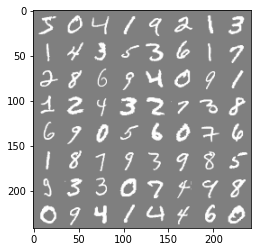

In [15]:
import matplotlib.pyplot as plt
import numpy as np

def ims_show(img, save=False, name=''):
  img = utils.make_grid(img.cpu().detach())
  img = (img+1)/2
  np_img = img.numpy()
  plt.imshow(np.transpose(np_img, (1, 2, 0)))
  #plt.show()
  if save==True: plt.savefig(name)

test_image, test_target = next(iter(trainloader))
ims_show(test_image[0:64,:,:])

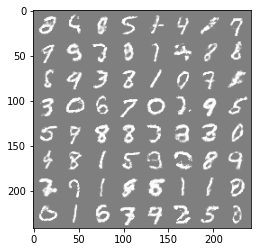

In [0]:
device = torch.device('cuda')
D = Discriminator().to(device); G = Generator().to(device)
g_optim = torch.optim.Adam(G.parameters(), lr=2e-4) # separate optimizers for the two networks
d_optim = torch.optim.Adam(D.parameters(), lr=2e-4)
lossf = torch.nn.BCELoss()
d_loss, g_loss = [], []

images = G(torch.randn(64, G.input_size).to(device)).reshape(-1, 1, 28, 28)
ims_show(images, True, 'plots/test_0.png')

for epoch in range(100):
  loss_d, loss_g = 0, 0
  for ii, (i, o) in enumerate(trainloader):
    _ = G.train()
    real, o = i.to(device), o.to(device)
    # some useful vectors
    ones = torch.tensor([1.]*i.size(0)).view(-1,1).to(device)
    zeros = torch.tensor([0.]*i.size(0)).view(-1,1).to(device)
    # update d
    d_optim.zero_grad()
    G.requires_grad=False # we don't need to keep the G gradients when updating d
    D.requires_grad=True
    loss = lossf(D(real), ones) # real images should have output 1
    loss.backward()
    fake = G(torch.randn(i.size(0), G.input_size).to(device))
    loss = lossf(D(fake), zeros) # fake images should have output 
    loss.backward()
    d_optim.step() # we've collected both the real and fake gradients
    loss_d += loss.item()/len(i)

    # update g
    g_optim.zero_grad()
    D.requires_grad=False # we don't need to keep the D gradients when updating d
    G.requires_grad=True
    fake = G(torch.randn(i.size(0), G.input_size).to(device))
    loss = lossf(D(fake), ones)
    loss.backward()
    fake = G(torch.randn(i.size(0), G.input_size).to(device))
    loss = lossf(D(fake), ones)
    loss.backward()
    g_optim.step()
    loss_g += loss.item()/len(i)

  _ = G.eval()
  images = G(torch.randn(64, G.input_size).to(device)).reshape(-1, 1, 28, 28)
  ims_show(images, True, 'plots/test_%d.png'%(epoch+1))

  d_loss.append(loss_d/len(trainloader))
  g_loss.append(loss_g/len(trainloader))

Output some images (change filename to one of the images you output,
load images for a few different epochs):



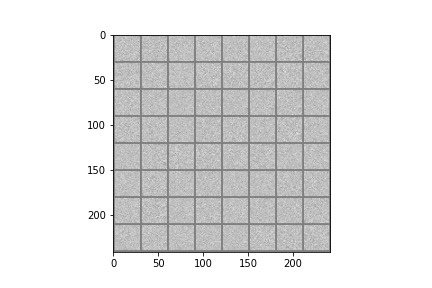

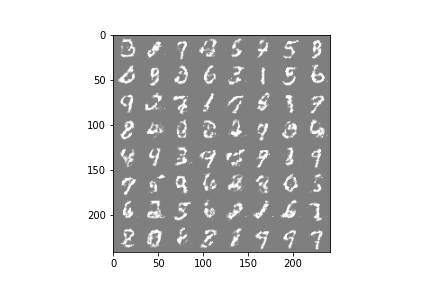

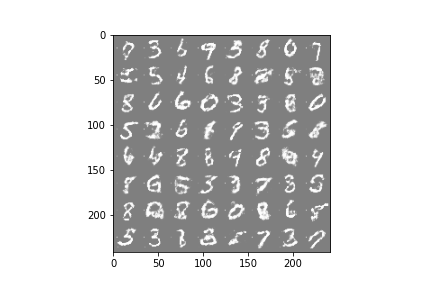

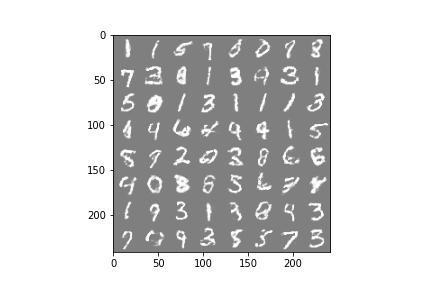

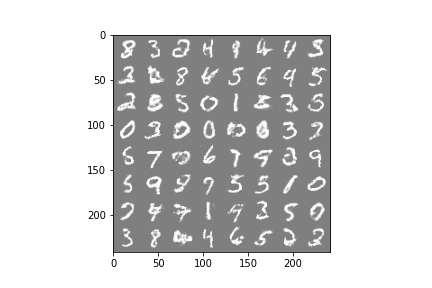

In [0]:
from IPython.display import Image # needed to embed an image
from IPython.display import display # needed to embed an image

for i in range(100):
  if i % 20 != 0: continue
  display(Image(filename='plots/test_%d.png'%i, embed=True))

Draw the generator and discriminator loss curves vs n epochs:



In [0]:
def plot_loss(x, trl, tel): #, tt):
  plt.plot(x, trl, label='generator loss')
  plt.plot(x, tel, color='orange', label='discriminator loss')
  #plt.title(tt)
  plt.legend()

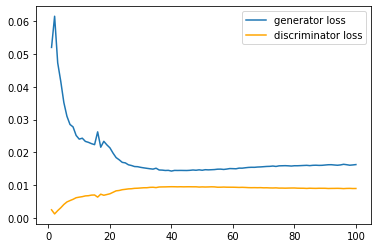

In [0]:
epochs = [i+1 for i in range(100)]
plot_loss(epochs, g_loss, d_loss)

In [0]:
print("It seems to be similar to your training curves plot :P")

It seems to be similar to your training curves plot :P


Now do the same, but use FashionMNIST for the training data instead of
MNIST. Change the discriminator and generator networks to be larger,
since this is more structured data.

Download the FashionMNIST data:



In [0]:
train_ = torchvision.datasets.FashionMNIST('/data/torchvision', train=True, download=True, transform=trans)
trainloader_ = torch.utils.data.DataLoader(train_, batch_size=64)

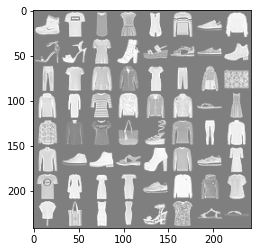

In [18]:
test_image2, test_target2 = next(iter(trainloader_))
ims_show(test_image2[0:64,:,:])

Build the networks:



In [0]:
class Disc(torch.nn.Module):
  def __init__(self):
    super(Disc, self).__init__()
    self.conv1 = torch.nn.Conv2d(1, 128, 4, stride=2, padding=1)
    self.conv2 = torch.nn.Conv2d(128, 256, 4, stride=2, padding=1)
    self.conv3 = torch.nn.Conv2d(256, 1, 7, stride=1, padding=0)
    self.bn1 = torch.nn.BatchNorm2d(128)
    self.bn2 = torch.nn.BatchNorm2d(256)
  def forward(self, x):
    x = torch.relu(self.bn1(self.conv1(x)))
    x = torch.relu(self.bn2(self.conv2(x)))
    x = self.conv3(x)
    x = torch.sigmoid(x).view(-1, 1)
    return x

In [0]:
class Gen(torch.nn.Module):
  def __init__(self, input_size=100):
    super(Gen, self).__init__()
    self.input_size = input_size
    self.convt1 = torch.nn.ConvTranspose2d(self.input_size, 512, 7, stride=1, padding=0)
    self.convt2 = torch.nn.ConvTranspose2d(512, 128, 4, stride=2, padding=1)
    self.convt3 = torch.nn.ConvTranspose2d(128, 1, 4, stride=2, padding=1)
    self.bn1 = torch.nn.BatchNorm2d(512)
    self.bn2 = torch.nn.BatchNorm2d(128)
  def forward(self, x):
    x = x.view(-1, 100, 1, 1)
    x = torch.relu(self.bn1(self.convt1(x)))
    x = torch.relu(self.bn2(self.convt2(x)))
    x = torch.tanh(self.convt3(x))
    return x.view(-1,1,28,28)

Run the training (monitor the loss so you can see if you've hit a
failure mode and need to change the hyperparameters to get the GAN to
train properly):



In [0]:
mkdir plots2

Generator Loss: 0.09740
Discriminator Loss: 0.00031
Generator Loss: 0.06078
Discriminator Loss: 0.00158
Generator Loss: 0.06429
Discriminator Loss: 0.00172
Generator Loss: 0.06622
Discriminator Loss: 0.00192
Generator Loss: 0.07100
Discriminator Loss: 0.00164


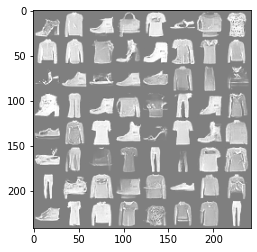

In [31]:
device = torch.device('cuda')
D2 = Disc().to(device); G2 = Gen().to(device)
g2_optim = torch.optim.Adam(G2.parameters(), lr=2e-4) # separate optimizers for the two networks
d2_optim = torch.optim.Adam(D2.parameters(), lr=2e-4)
lossf2 = torch.nn.BCELoss()
d2_loss, g2_loss = [], []

images = G2(torch.randn(64, G2.input_size).to(device)).reshape(-1, 1, 28, 28)
ims_show(images, True, 'plots2/test_0.png')

for epoch in range(100):
  if epoch %2 != 0: continue
  loss_d2, loss_g2 = 0, 0
  for ii, (i, o) in enumerate(trainloader_):
    _ = G2.train()
    real, o = i.to(device), o.to(device)
    # some useful vectors
    ones = torch.tensor([1.]*i.size(0)).view(-1,1).to(device)
    zeros = torch.tensor([0.]*i.size(0)).view(-1,1).to(device)
    # update d
    d2_optim.zero_grad()
    G2.requires_grad=False # we don't need to keep the G gradients when updating d
    D2.requires_grad=True
    loss = lossf2(D2(real), ones) # real images should have output 1
    loss.backward()
    fake = G2(torch.randn(i.size(0), G2.input_size).to(device))
    loss = lossf2(D2(fake), zeros) # fake images should have output 
    loss.backward()
    d2_optim.step() # we've collected both the real and fake gradients
    loss_d2 += loss.item()/len(i)

    # update g
    g2_optim.zero_grad()
    D2.requires_grad=False # we don't need to keep the D gradients when updating d
    G2.requires_grad=True
    fake = G2(torch.randn(i.size(0), G2.input_size).to(device))
    loss = lossf2(D2(fake), ones)
    loss.backward()
    fake = G2(torch.randn(i.size(0), G2.input_size).to(device))
    loss = lossf2(D2(fake), ones)
    loss.backward()
    g2_optim.step()
    loss_g2 += loss.item()/len(i)

  if epoch % 20 == 0:   
    print("Generator Loss: {:.5f}".format(loss_g2/len(trainloader_)))
    print("Discriminator Loss: {:.5f}".format(loss_d2/len(trainloader_)))

  _ = G2.eval()
  images = G2(torch.randn(64, G2.input_size).to(device)).reshape(-1, 1, 28, 28)
  ims_show(images, True, 'plots2/test_%d.png'%(epoch+1))

  d2_loss.append(loss_d2/len(trainloader_))
  g2_loss.append(loss_g2/len(trainloader_))

Output some images you previously saved:



In [24]:
ls plots2/

test_0.png   test_25.png  test_41.png  test_59.png  test_75.png  test_91.png
test_11.png  test_27.png  test_43.png  test_5.png   test_77.png  test_93.png
test_13.png  test_29.png  test_45.png  test_61.png  test_79.png  test_95.png
test_15.png  test_31.png  test_47.png  test_63.png  test_7.png   test_97.png
test_17.png  test_33.png  test_49.png  test_65.png  test_81.png  test_99.png
test_19.png  test_35.png  test_51.png  test_67.png  test_83.png  test_9.png
test_1.png   test_37.png  test_53.png  test_69.png  test_85.png
test_21.png  test_39.png  test_55.png  test_71.png  test_87.png
test_23.png  test_3.png   test_57.png  test_73.png  test_89.png


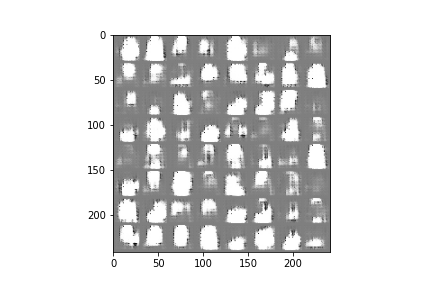

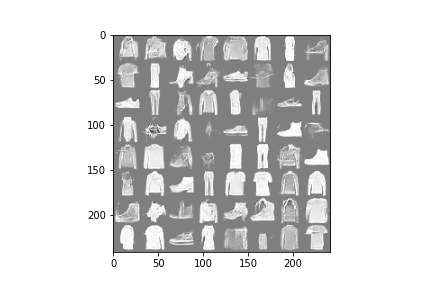

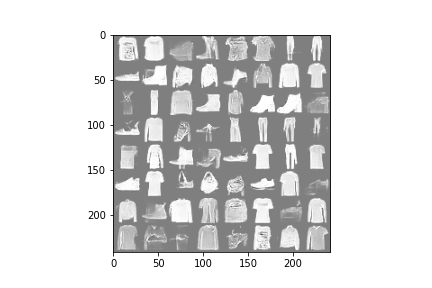

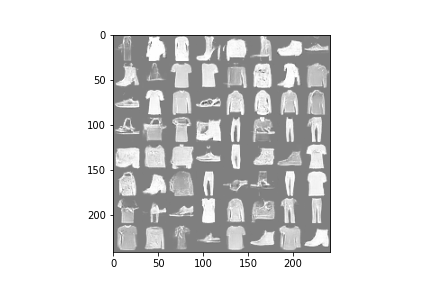

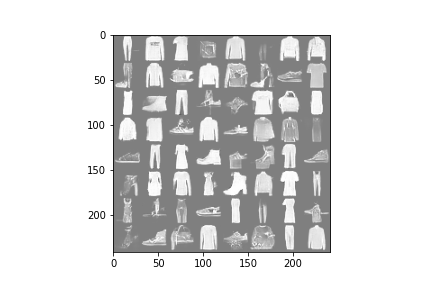

In [32]:
from IPython.display import Image
from IPython.display import display

for i in range(100):
  if i % 2 != 0: continue
  if i % 20 != 0: continue
  display(Image(filename='plots2/test_%d.png'%(i+1), embed=True))

Draw the loss curves:



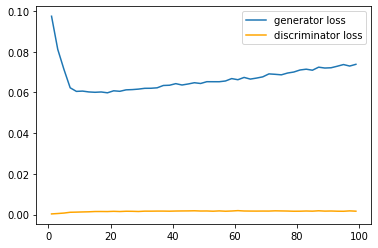

In [33]:
epochs = [2*i+1 for i in range(50)]
plot_loss(epochs, g2_loss, d2_loss)